<a href="https://colab.research.google.com/github/gulliyevn/MachineLearningProjects/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [345]:
churn=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [346]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [347]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [348]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [349]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [350]:
churn.drop('RowNumber',axis=1,inplace=True)
churn.drop('CustomerId',axis=1,inplace=True)
churn.drop('Surname',axis=1,inplace=True)

In [351]:
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [352]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict

In [353]:
laben=LabelEncoder()
reg=RandomForestClassifier()
std_scaler=StandardScaler()
poly_feat=PolynomialFeatures()
ler=LinearRegression()

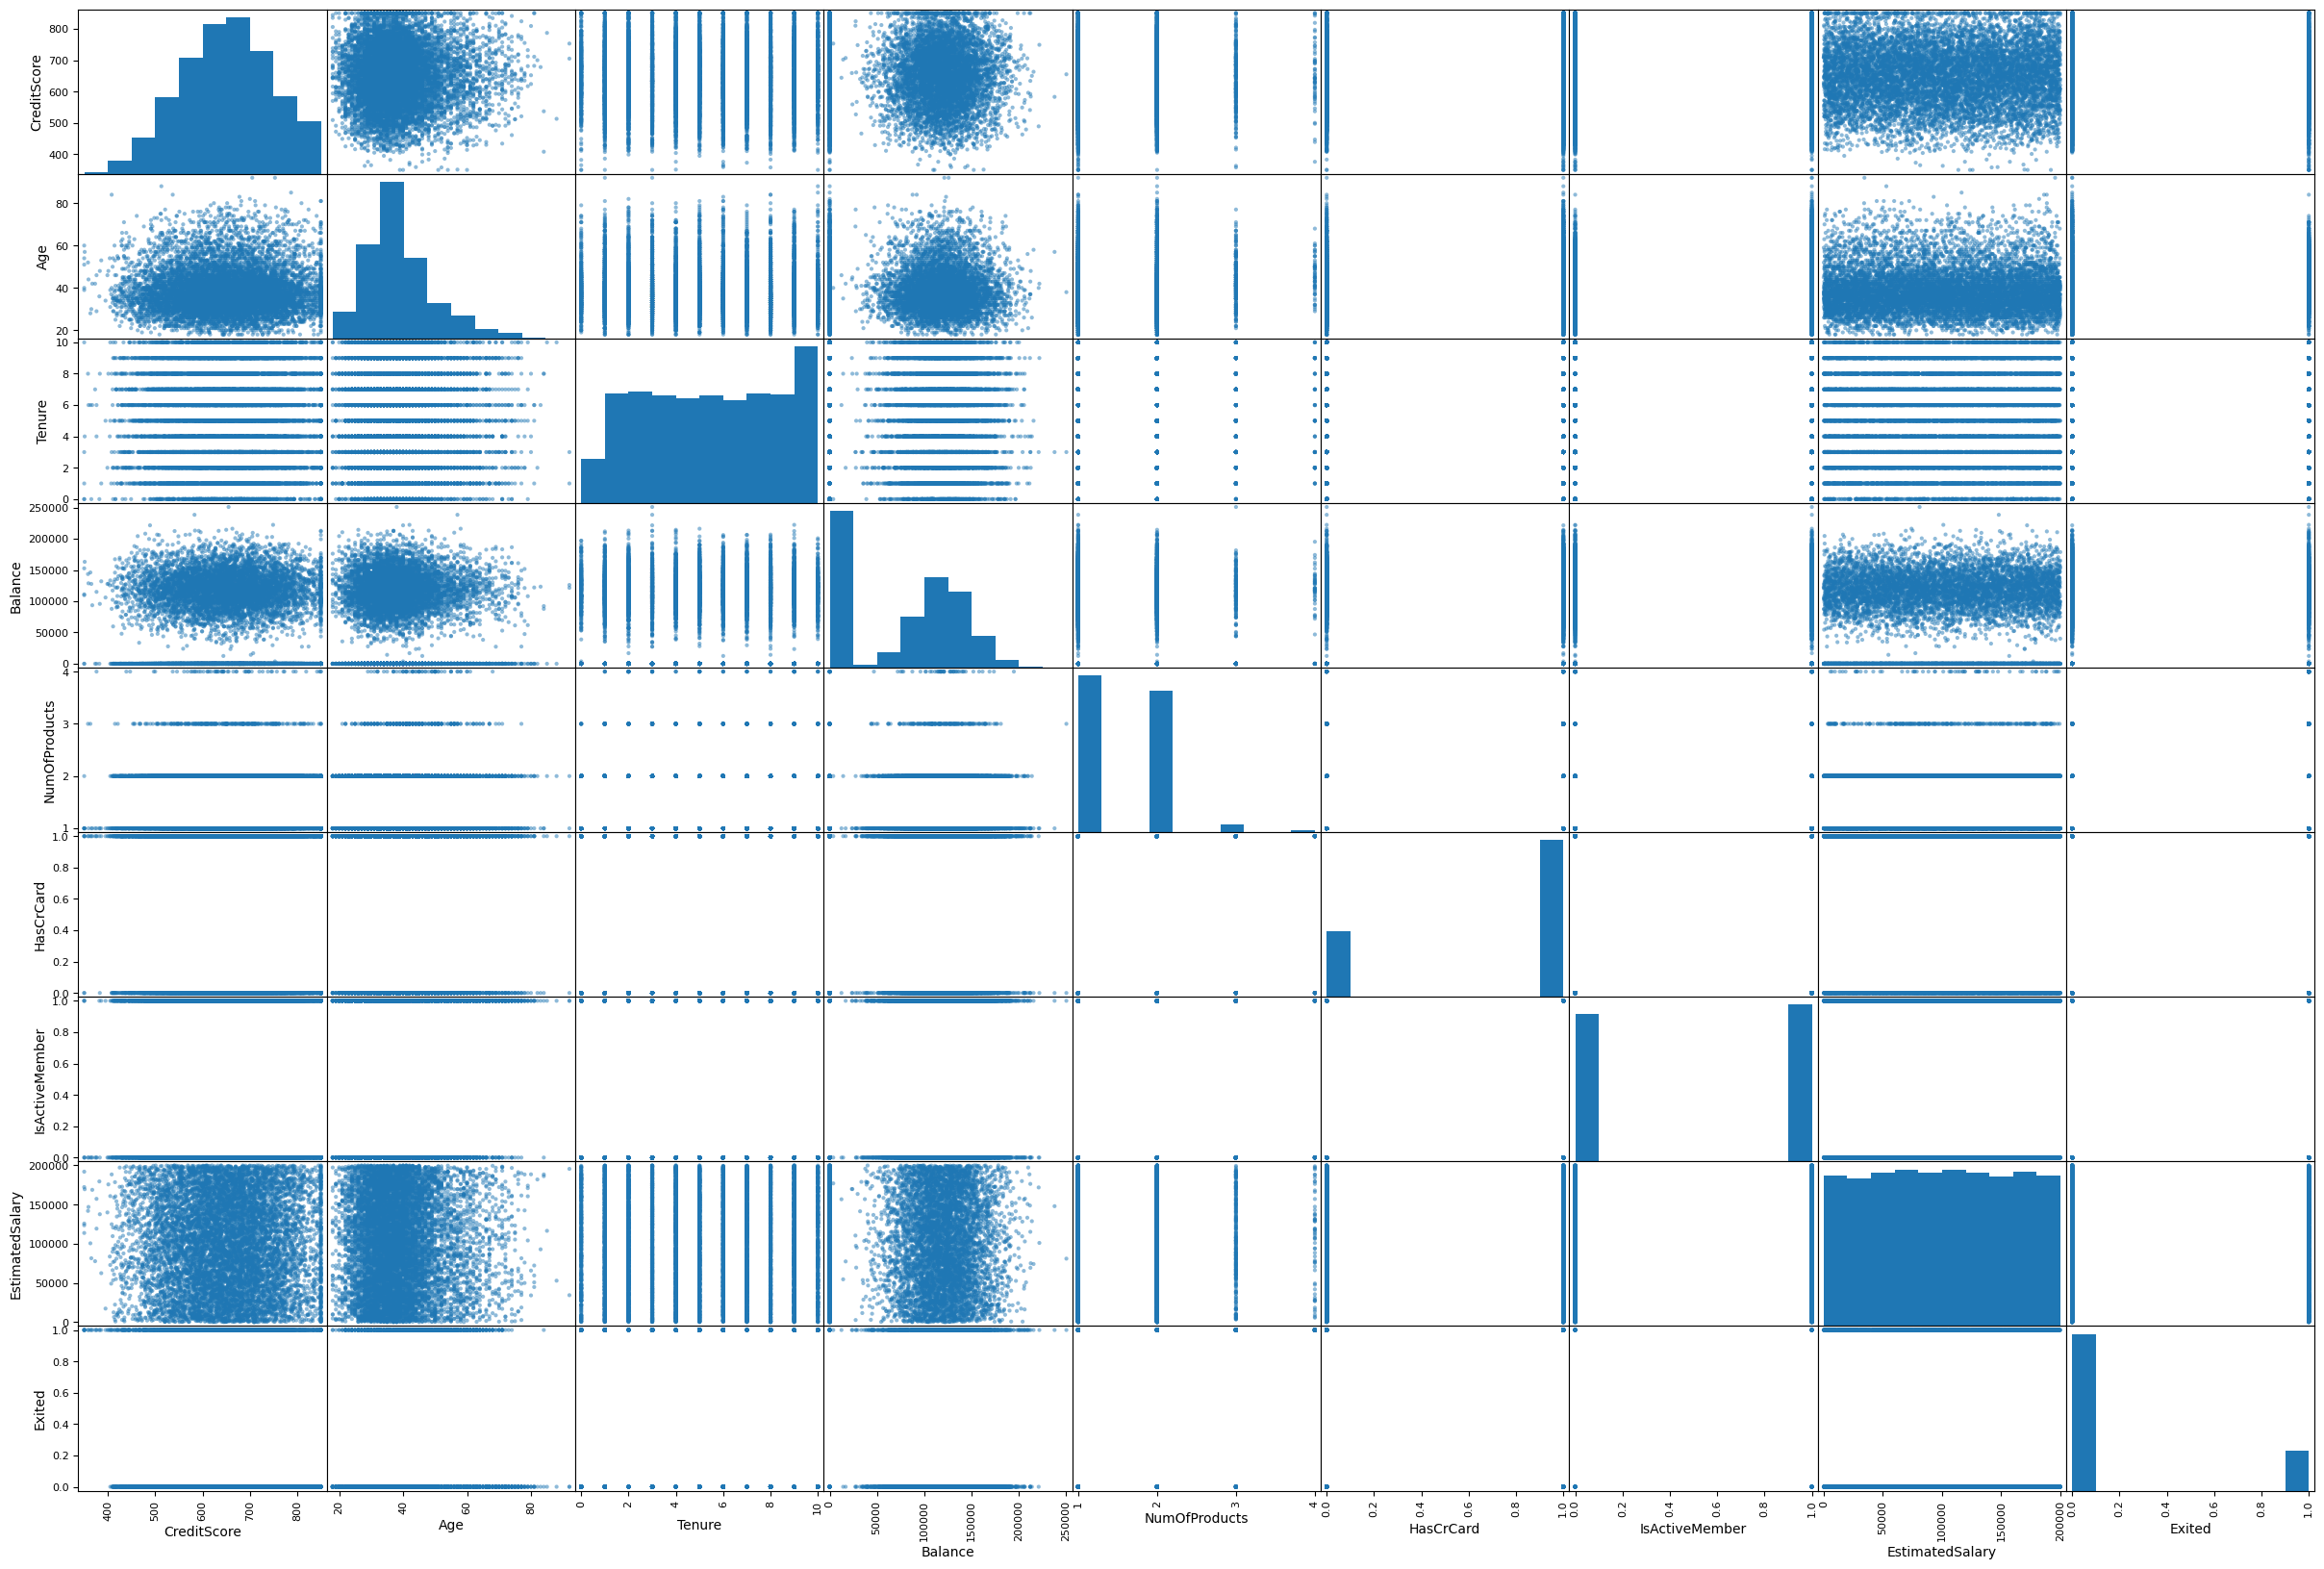

In [354]:
scatter_matrix(churn,figsize=(30,20))
plt.show()

In [355]:
# Əlaqənin faizinə baxılır
churn. corr (numeric_only = True) ['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [356]:
churn=churn[(churn['Balance'] != 0)|(churn['Exited']!=0)]

In [357]:
churn['Geography'].value_counts()

Geography
France     2933
Germany    2509
Spain      1441
Name: count, dtype: int64

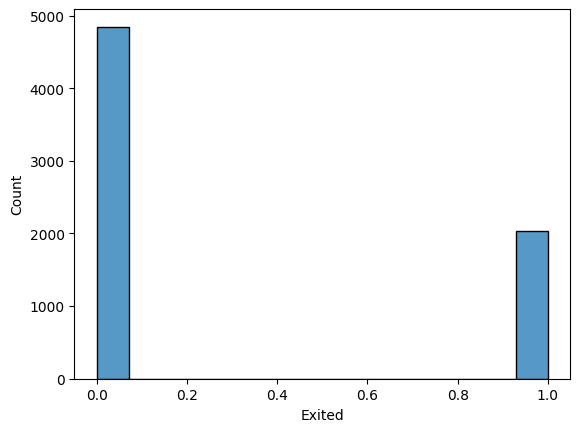

In [358]:
sns.histplot(churn['Exited'])
plt.show()

<Axes: >

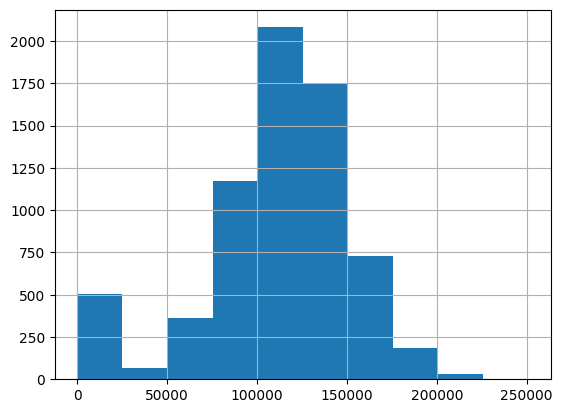

In [359]:
churn['Balance'].hist()

In [360]:
churn['Geography']=laben.fit_transform(churn['Geography'])
churn['Gender']=laben.fit_transform(churn['Gender'])

<ipython-input-360-999be58eb4cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Geography']=laben.fit_transform(churn['Geography'])
<ipython-input-360-999be58eb4cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['Gender']=laben.fit_transform(churn['Gender'])


In [361]:
X=churn.drop('Exited',axis=1)
y=churn['Exited'].copy()

In [362]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
...,...,...,...,...,...,...,...,...,...,...
9993,644,0,1,28,7,155060.41,1,1,0,29179.52
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [363]:
y

0       1
1       0
2       1
4       0
5       1
       ..
9993    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 6883, dtype: int64

In [364]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2)

In [365]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5506, 10), (1377, 10), (5506,), (1377,))

In [366]:
text=X_train.select_dtypes(exclude=[np.number]).columns
num=X_train.select_dtypes(include=[np.number]).columns

In [367]:
text_pipeline=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='most_frequent')),
                        ('onehot',OneHotEncoder())])
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler()),
                       ('poly_feat',PolynomialFeatures(degree=2,include_bias=False))])

In [368]:
transformer=ColumnTransformer([('onehot',text_pipeline,text),
                               ('num_pip',num_pipeline,num)],remainder='passthrough')

In [369]:
logistic_pipeline=make_pipeline(
    transformer,
    LogisticRegression(max_iter=1000,class_weight={0:0.4,1:0.6})
)

logistic_pipeline.fit(X_train, y_train)
logistic_pipeline.score(X_test, y_test)

0.8104575163398693

In [370]:
preds=logistic_pipeline.predict(X_test)

f1_score(y_test,preds)

0.6524633821571239

In [371]:
preds = cross_val_predict (logistic_pipeline, X, y, cv = 5)
f1_score(y, preds)

0.6910803034266283

In [374]:
reg.fit(X_train,y_train)

RandomForestClassifier()

In [375]:
reg.score(X_test,y_test)

0.8402323892519971